# Import Lib

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

# Import Data

In [10]:
df=pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# DataSet Info
<h5>1>Gender<br>
2>Race : group A-E<br>
3>Education <br>
4>Lunch<br>
5>Test Preparation<br>
6>Math Score<br>
7>Reading Score<br>
8>writing score<br>
</h5>

# Things to check
1) Missing Values
2) Outliers
3) Duplicates
4) Categories
5) Stats

In [12]:
df.isna().sum()# No Missing Values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.duplicated().sum()# No duplicate rows

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
print(df['gender'].unique())
print(df['lunch'].unique())
print(df['parental level of education'].unique())
print(df['race/ethnicity'].unique())
print(df['test preparation course'].unique())

['female' 'male']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']
['none' 'completed']


In [36]:
num_feat=[feat for feat in df.columns if df[feat].dtype!='O']
col_feat=[feat for feat in df.columns if feat not in num_feat]
print(num_feat,col_feat)

['math score', 'reading score', 'writing score'] ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding New features
Total Score and Average Score

In [37]:
df['Total Score']=df['math score']+df['reading score']+df['writing score']
df['Average Score']=(df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
math_full=df[df['math score']==100]['Average Score'].count()
read_full=df[df['reading score']==100]['Average Score'].count()
write_full=df[df['writing score']==100]['Average Score'].count()
print(f'No. of students 100 in math: {math_full}')
print(f'No. of students 100 in reading: {read_full}')
print(f'No. of students 100 in writing: {write_full}')


No. of students 100 in math: 7
No. of students 100 in reading: 17
No. of students 100 in writing: 14


In [46]:
math_fail=df[df['math score']<=20]['Average Score'].count()
read_fail=df[df['reading score']<=20]['Average Score'].count()
write_fail=df[df['writing score']<=20]['Total Score'].count()
print(f'No. of students 100 in math: {math_fail}')
print(f'No. of students 100 in reading: {read_fail}')
print(f'No. of students 100 in writing: {write_fail}')

No. of students 100 in math: 4
No. of students 100 in reading: 1
No. of students 100 in writing: 3


<h3>Best Subject :Reading <br>Worst Subject :Math

<Axes: xlabel='Average Score', ylabel='Count'>

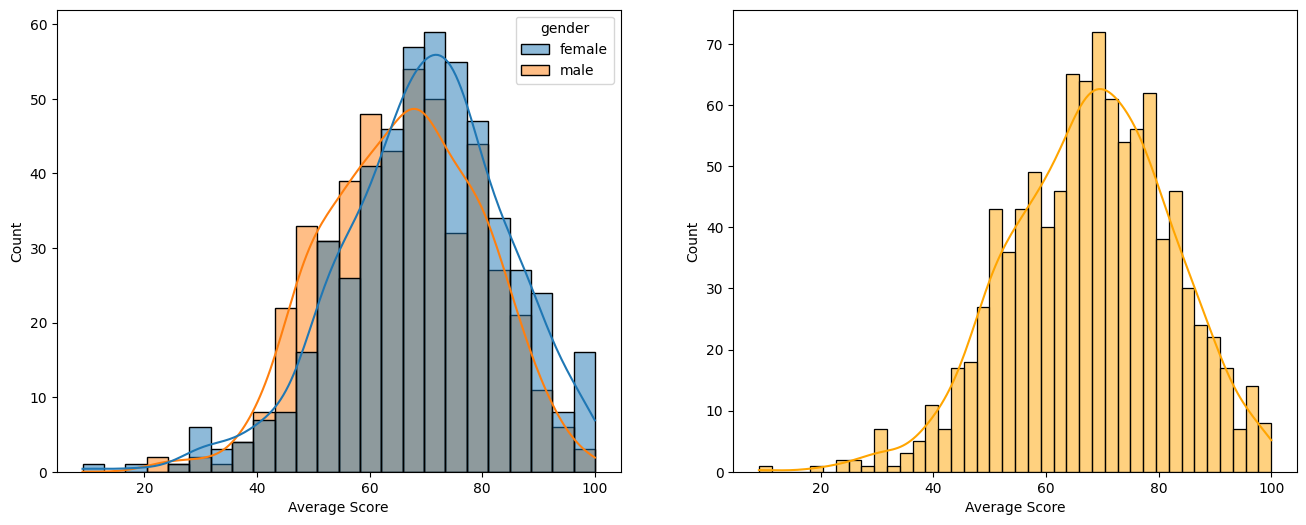

In [48]:
fig=plt.subplots(1,2,figsize=(16,6))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
sns.histplot(data=df,x='Average Score',hue='gender',kde=True,ax=ax1)
sns.histplot(data=df,x='Average Score',bins=40,color='orange',kde=True,ax=ax2)

<Axes: xlabel='Average Score', ylabel='Count'>

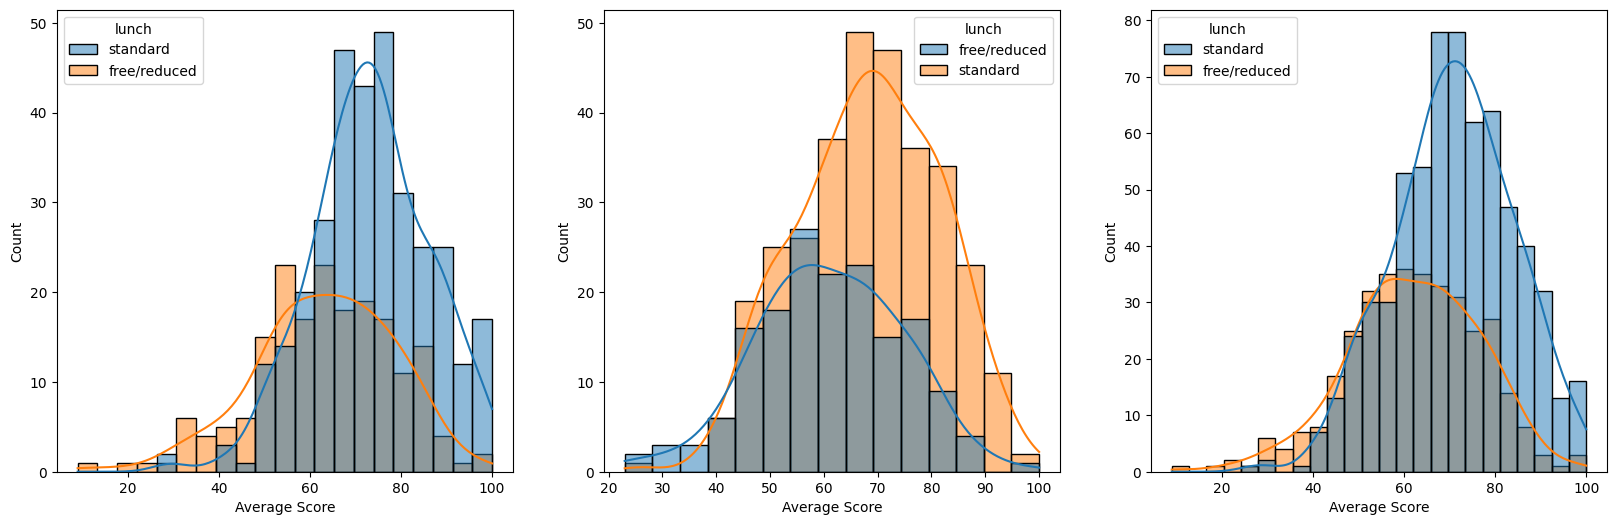

In [ ]:
fig=plt.subplots(1,3,figsize=(20,6))
ax1=plt.subplot(1,3,1)
ax2=plt.subplot(1,3,2)
ax3=plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'],x='Average Score',hue='lunch',kde=True,ax=ax1)
sns.histplot(data=df[df.gender=='male'],x='Average Score',hue='lunch',color='orange',kde=True,ax=ax2)
sns.histplot(data=df,x='Average Score',hue='lunch',kde=True,ax=ax3)


<Axes: xlabel='Average Score', ylabel='Count'>

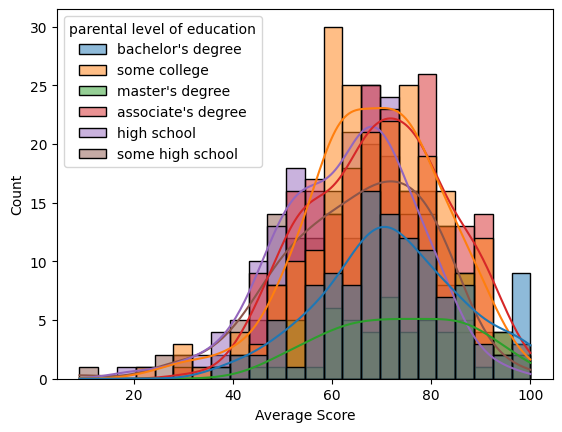

In [57]:

sns.histplot(data=df,x='Average Score',hue='parental level of education',kde=True,)

<Axes: xlabel='Average Score', ylabel='Count'>

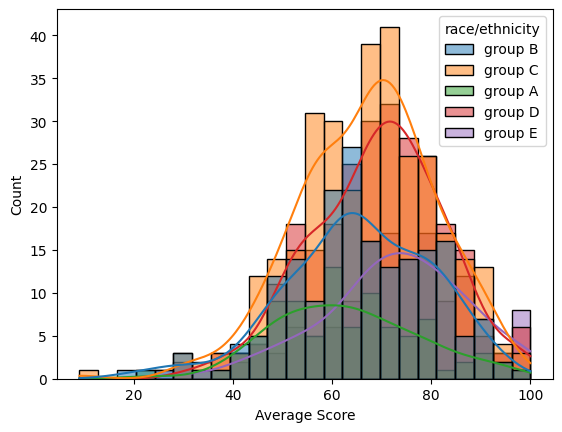

In [59]:
sns.histplot(data=df,x='Average Score',hue='race/ethnicity',kde=True)

<Axes: ylabel='writing score'>

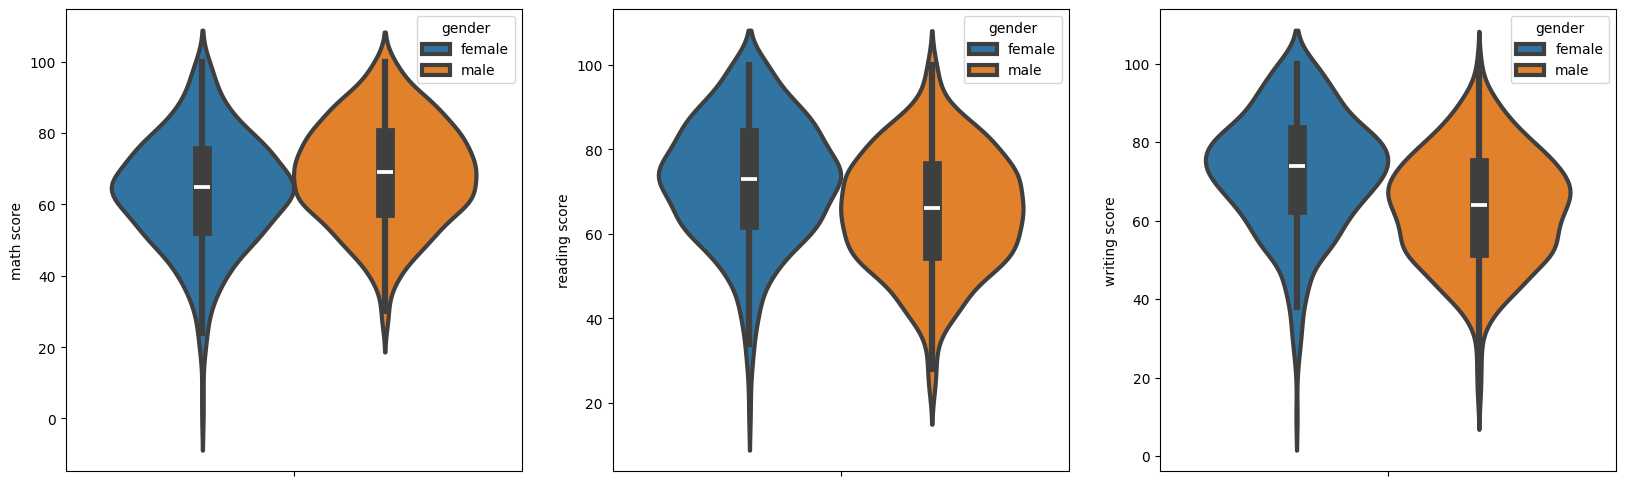

In [69]:
fig=plt.subplots(1,3,figsize=(20,6))
ax1=plt.subplot(1,3,1)
ax2=plt.subplot(1,3,2)
ax3=plt.subplot(1,3,3)
sns.violinplot(data=df,y='math score',ax=ax1,hue='gender',linewidth=3)
sns.violinplot(data=df,y='reading score',ax=ax2,hue='gender',linewidth=3)
sns.violinplot(data=df,y='writing score',ax=ax3,hue='gender',linewidth=3)


Text(0.5, 1.0, 'Lunch')

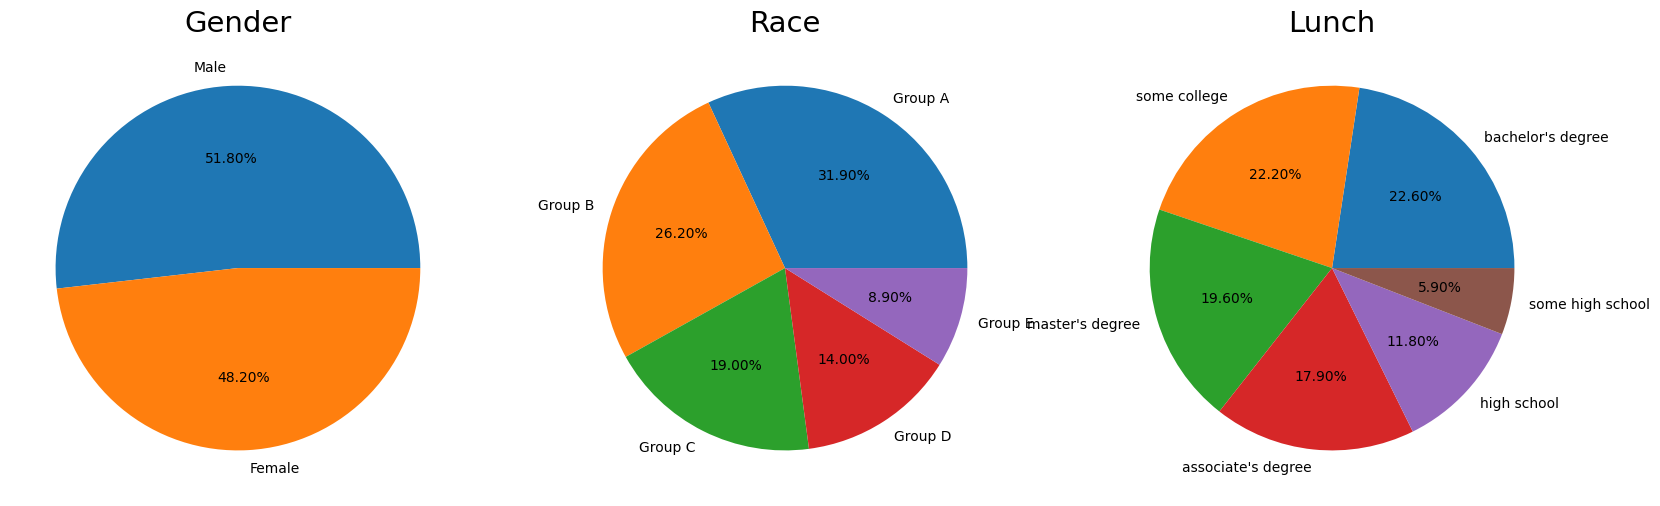

In [85]:
size=df['gender'].value_counts()
label='Male','Female'
fig=plt.subplots(1,3,figsize=(20,6))
plt.subplot(1,3,1)
plt.pie(x=size,labels=label,autopct='%.2f%%')
plt.title('Gender',fontsize=21)
plt.subplot(1,3,2)
plt.pie(x=df['race/ethnicity'].value_counts(),labels=['Group A','Group B','Group C','Group D','Group E'],autopct='%.2f%%')
plt.title('Race',fontsize=21)
plt.subplot(1,3,3)
plt.pie(x=df['parental level of education'].value_counts(),labels=df['parental level of education'].unique(),autopct='%.2f%%')
plt.title('Lunch',fontsize=21)



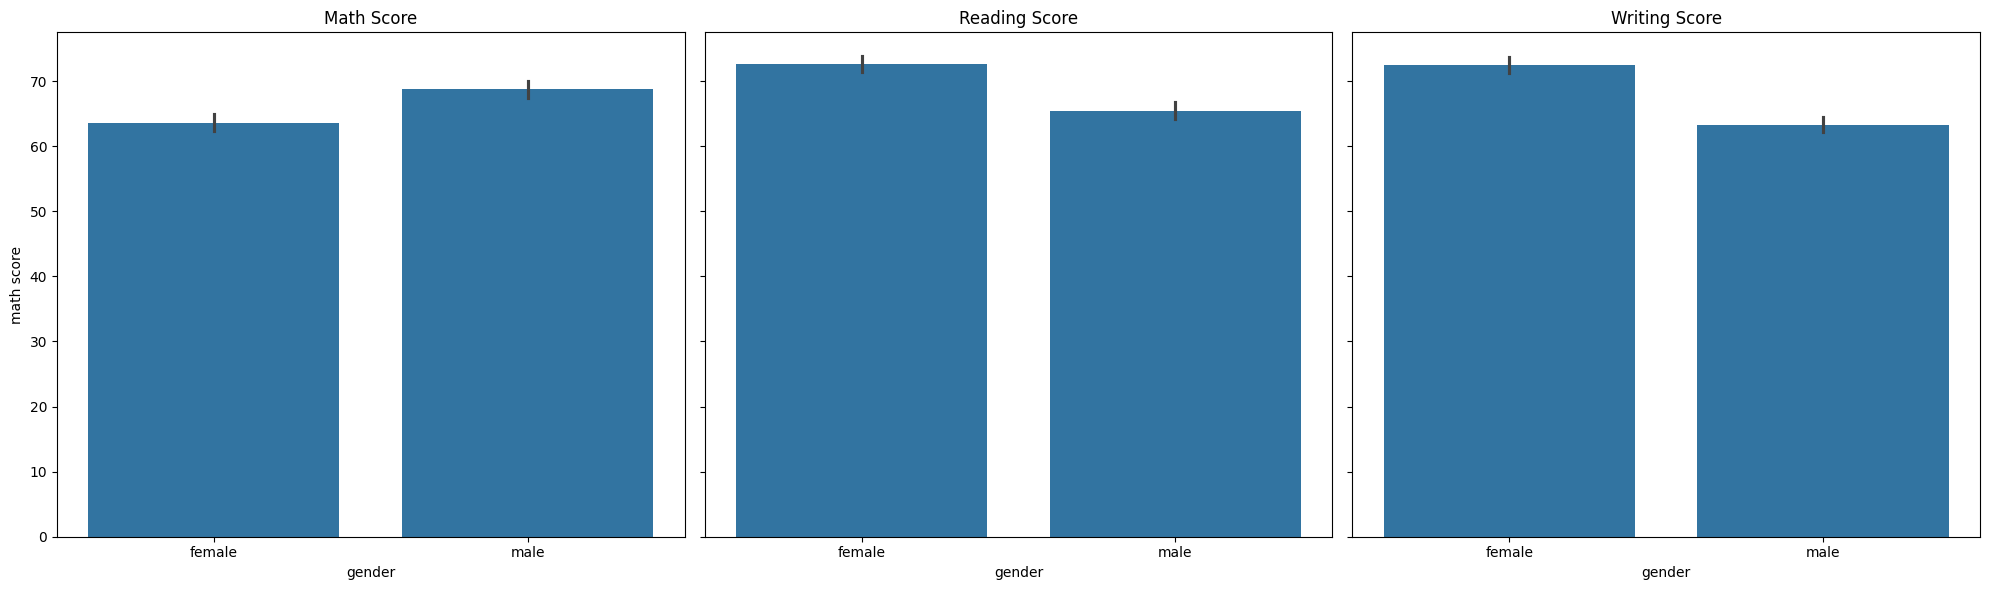

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.barplot(data=df, y='math score', x='gender', ax=axes[0])
axes[0].set_title("Math Score")

sns.barplot(data=df, y='reading score', x='gender', ax=axes[1])
axes[1].set_title("Reading Score")

sns.barplot(data=df, y='writing score', x='gender', ax=axes[2])
axes[2].set_title("Writing Score")

plt.tight_layout()

<Axes: ylabel='writing score'>

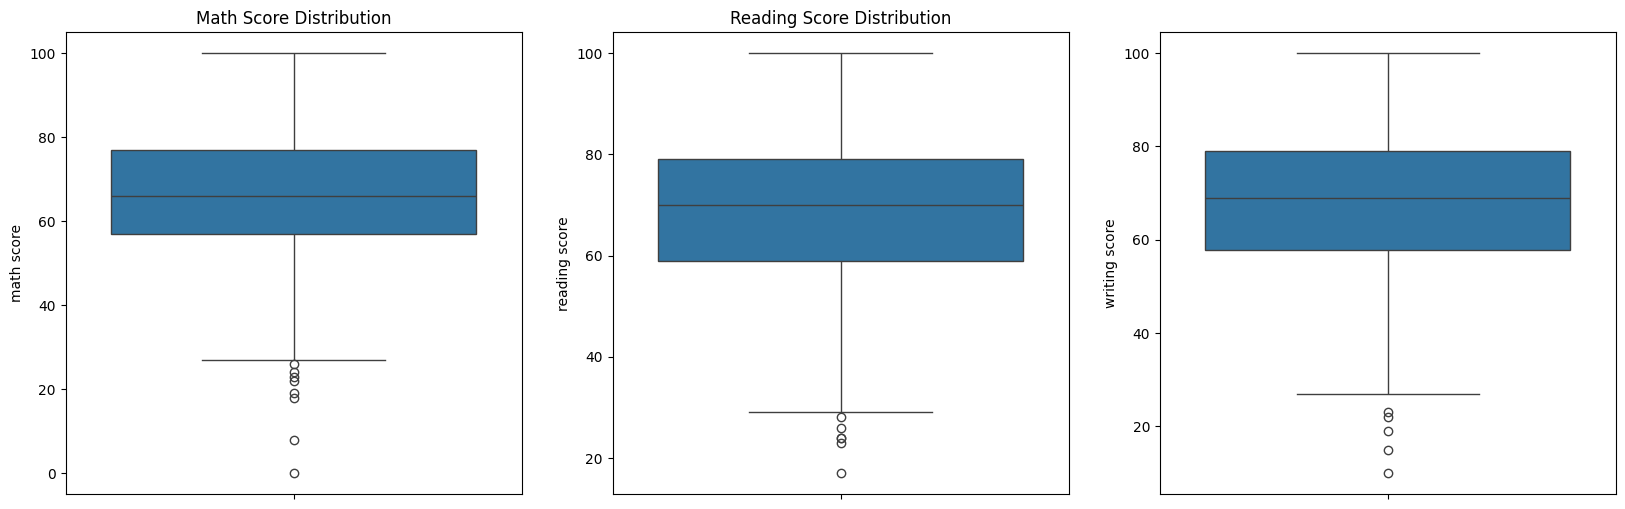

In [107]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df['math score'])
plt.title('Math Score Distribution')
plt.subplot(1,3,2)
sns.boxplot(df['reading score'])
plt.title('Reading Score Distribution')
plt.subplot(1,3,3)
sns.boxplot(df['writing score'])



<Axes: xlabel='lunch', ylabel='math score'>

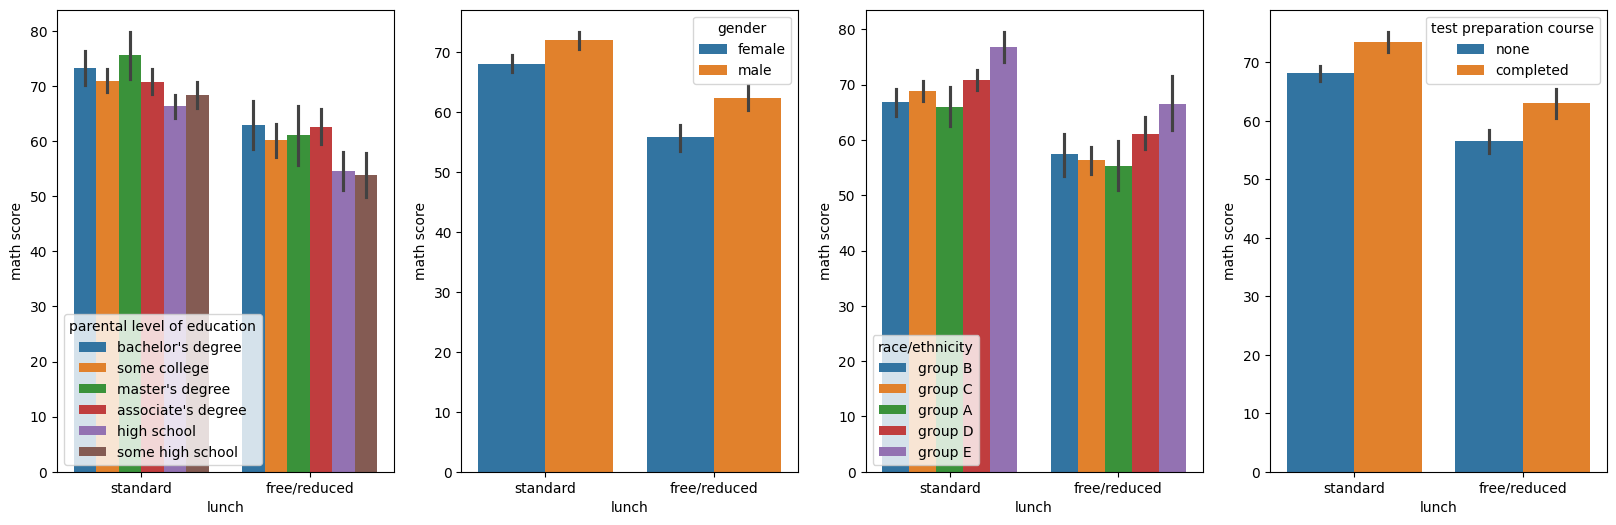

In [113]:
plt.subplots(1,4,figsize=(20,6))
plt.subplot(1,4,1)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['parental level of education'])
plt.subplot(1,4,2)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['gender'])
plt.subplot(1,4,3)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['race/ethnicity'])
plt.subplot(1,4,4)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['test preparation course'])

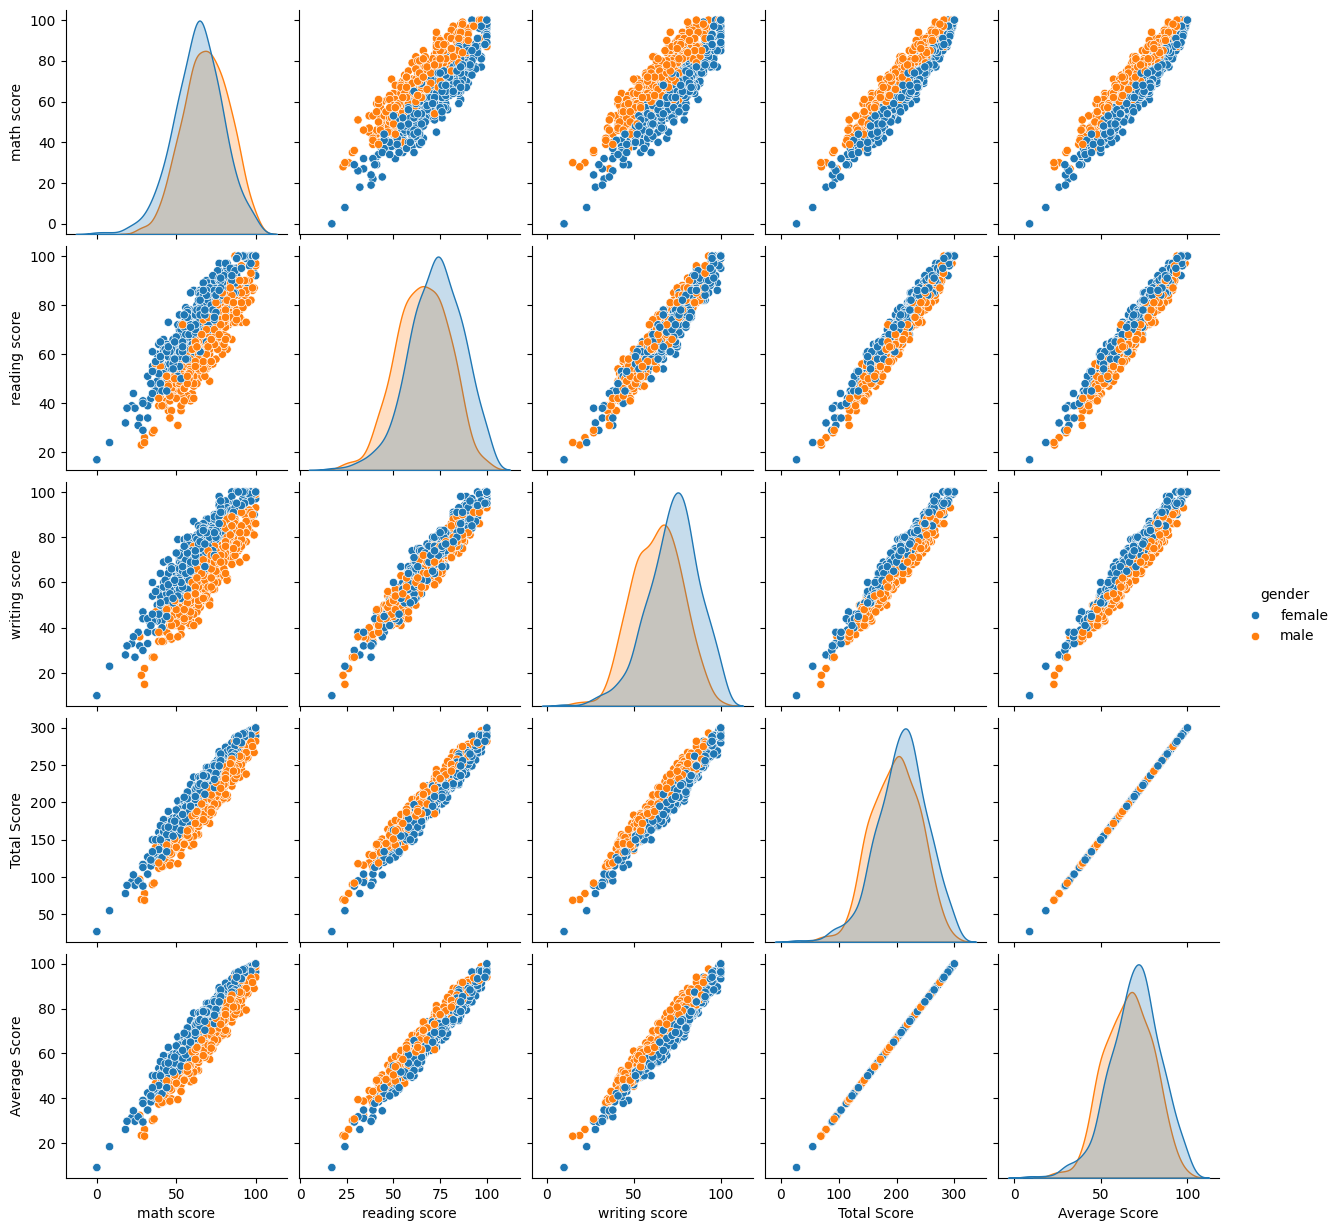

In [114]:
sns.pairplot(data=df,hue='gender')